<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Feynman_Diagram_Property_Purchase_Payment_Schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Property Transaction Simulation ---

Week 1:
  [+] Completed: Exercise Option — Payment: 5% (Total Paid: 5%)
  [+] Completed: Downpayment — Payment: 15% (Total Paid: 20%)
  [+] Completed: SAL Stakeholding — Payment: 15% (Total Paid: 35%)
Week 2:
  [+] Completed: Foundation Work — Payment: 10% (Total Paid: 45%)
Week 3:
  [+] Completed: RC Framework — Payment: 10% (Total Paid: 55%)
  [+] Completed: Partition Walls — Payment: 5% (Total Paid: 60%)
  [+] Completed: Ceiling Complete — Payment: 5% (Total Paid: 65%)
Week 4:
  [+] Completed: Electrical/Plumbing — Payment: 5% (Total Paid: 70%)
Week 5:
  [+] Completed: Infrastructure — Payment: 5% (Total Paid: 75%)
Week 6:
Week 7:
  [!] Delay at step: TOP/CSC/Gas
Week 8:
Week 9:
  [+] Completed: TOP/CSC/Gas — Payment: 25% (Total Paid: 100%)

--- Simulation Complete ---
Total Progress: 10 / 10 milestones completed
Total Paid: 100%


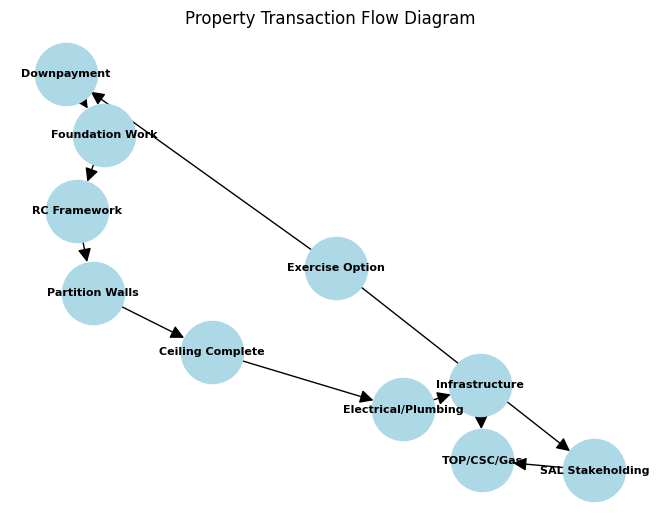

In [1]:
!pip install matplotlib networkx
import random
import time
import matplotlib.pyplot as plt
import networkx as nx

# Define transaction steps
steps = [
    {"name": "Exercise Option", "payment": 5, "delay": 0, "depends_on": [], "max_weeks": 1},
    {"name": "Downpayment", "payment": 15, "delay": 0, "depends_on": [0], "max_weeks": 8},
    {"name": "Foundation Work", "payment": 10, "delay": 2, "depends_on": [1]},
    {"name": "RC Framework", "payment": 10, "delay": 2, "depends_on": [2]},
    {"name": "Partition Walls", "payment": 5, "delay": 1, "depends_on": [3]},
    {"name": "Ceiling Complete", "payment": 5, "delay": 1, "depends_on": [4]},
    {"name": "SAL Stakeholding", "payment": 15, "delay": 1, "depends_on": [0]},
    {"name": "Electrical/Plumbing", "payment": 5, "delay": 2, "depends_on": [5]},
    {"name": "Infrastructure", "payment": 5, "delay": 2, "depends_on": [7]},
    {"name": "TOP/CSC/Gas", "payment": 25, "delay": 4, "depends_on": [6, 8]},
]

# Initialize state
completed = [False] * len(steps)
current_week = 0
max_weeks = 52
status_log = []
total_paid = 0

print("\n--- Property Transaction Simulation ---\n")

while current_week < max_weeks and not all(completed):
    print(f"Week {current_week + 1}:")
    for i, step in enumerate(steps):
        if completed[i]:
            continue

        dependencies_met = all(completed[d] for d in step.get("depends_on", []))
        if dependencies_met:
            # Introduce random risk of delay (10%)
            if random.random() < 0.1:
                print(f"  [!] Delay at step: {step['name']}")
                continue

            # Simulate delay in weeks
            if "weeks_waited" not in step:
                step["weeks_waited"] = 0

            step["weeks_waited"] += 1
            if step.get("max_weeks") and step["weeks_waited"] > step["max_weeks"]:
                print(f"  [!] Missed deadline for {step['name']} (default risk)")
                continue

            if step["weeks_waited"] >= step.get("delay", 0):
                completed[i] = True
                total_paid += step["payment"]
                print(f"  [+] Completed: {step['name']} — Payment: {step['payment']}% (Total Paid: {total_paid}%)")

    status_log.append((current_week + 1, total_paid))
    current_week += 1
    time.sleep(0.1)  # Simulate passage of time visually (optional)

print("\n--- Simulation Complete ---")
print(f"Total Progress: {sum(completed)} / {len(steps)} milestones completed")
print(f"Total Paid: {total_paid}%")

# Draw diagram of transaction process using NetworkX
G = nx.DiGraph()

# Add nodes and edges
for i, step in enumerate(steps):
    G.add_node(i, label=step["name"])
    for dep in step.get("depends_on", []):
        G.add_edge(dep, i)

# Draw graph
pos = nx.spring_layout(G, seed=42)
labels = {i: step["name"] for i, step in enumerate(steps)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightblue", font_size=8, font_weight='bold', arrowsize=20)
plt.title("Property Transaction Flow Diagram")
plt.show()
